# Bit-Plane Slicing


The pixel values in the photo are actually integers made up of bits. The equivalent of each intensity value (from 0-255 for a photo that is assumed to be 8 bits) is eight bits. 
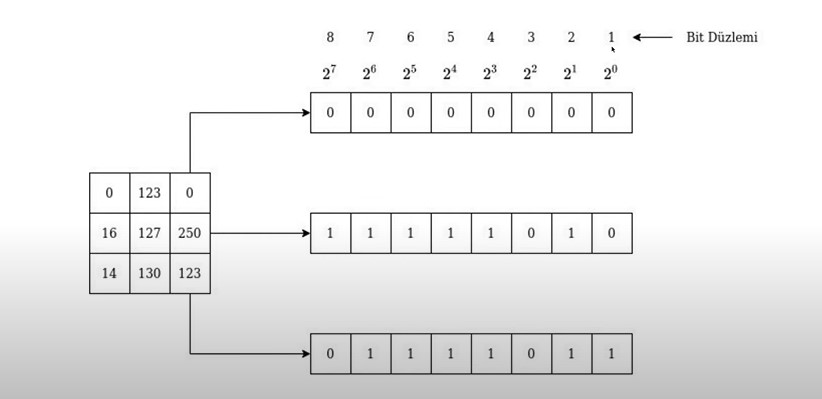


We want to display our photo in bitplane. While the quality of our image is quite good in high-value bitplanes, noise increases in our image in lower bitplanes. As a result, higher order bits carry more information for the photo. We can compress our photo by keeping only the high-value bits of our photo. At the same time, we do not experience much information loss.Let's code!

In [156]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

I am writing my stack and scaling functions that I shared in my previous codes. The Stack Function is output to view photos side by side. The scaling (normalization) function is to keep the density values between 0-255 after processing on it. Usually, photos are 255+1-->0 because they are unsigned integer (8- bit).

In [157]:
def stack(*args):
    return np.hstack(args)

In [158]:
def normalization(image):
    s= image.astype(float)
    s-=np.min(s)
    s/=np.max(s)
    return (s*255).astype(np.uint8)

In [193]:
image= cv2.imread("human.jpg",0)


0<= bit_plane <=7 np.bitwise_and will return us new density values by performing the and operation of the bitplane with our photo of our choice.

In [194]:
def bit_plane_sciling(image, bit_plane):
    bit_image= np.full_like(image, 2**bit_plane)
    return np.bitwise_and(image,bit_image)
    

I want to get all bitplanes. A for loop would be appropriate for this.

In [195]:
bit_planes= []
for bit_plane in range (8):
    bit_image= bit_plane_sciling(image,bit_plane)
    bit_image= normalization(bit_image)
    bit_planes.append(bit_image) 

Let's invert the Bit Planes array. (with numpy)

In [196]:
bit_planes= bit_planes[: : -1]

In [197]:
line1= stack(image,bit_planes[0],bit_planes[1])
line2= stack(bit_planes[2],bit_planes[3],bit_planes[4])
line3= stack(bit_planes[5],bit_planes[6],bit_planes[7])

In [198]:
grid= np.vstack((line1,line2,line3))

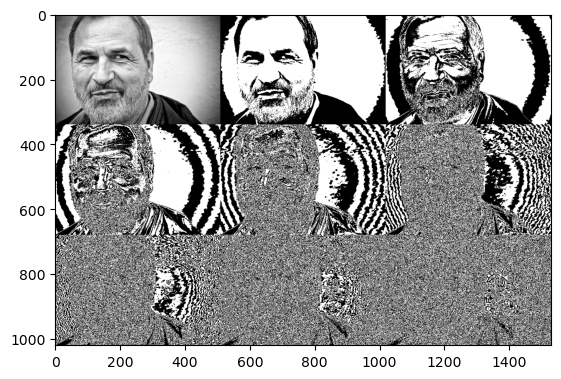

In [199]:
plt.imshow(grid, cmap="gray")
plt.show()

Now let's compress our photo using this information. We can collect the bitplanes we want for the compression process. If we add up all the bitplanes we have, we get the photo itself.

In [200]:
bit_planes= []

def image_compression(image, bit_planes):
    c_image =np.zeros_like(image)
    for bit_plane in bit_planes:
        c_image+= bit_plane_sciling(image,bit_plane)
        return c_image
    
    
compressed_image1= image_compression(image, [7,6])
compressed_image2= image_compression(image, [7,6,5,4])
compressed_image3= image_compression(image, [7,6,5,4,3,2])
compressed_image4= image_compression(image, [7,6,5,4,3,2,1,0])
    


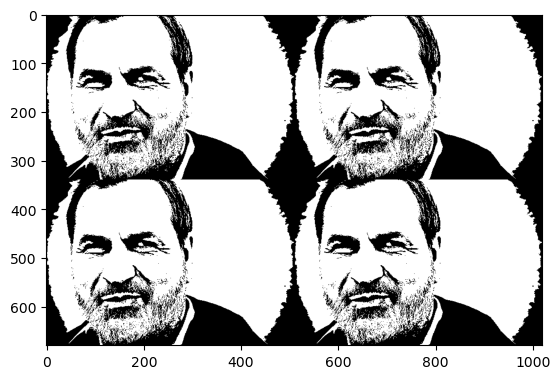

In [201]:
line1= stack(compressed_image1,compressed_image2)
line2= stack(compressed_image3,compressed_image4)
grid2= np.vstack((line1,line2))

plt.imshow(grid2, cmap="gray")
plt.show()


